<a href="https://colab.research.google.com/github/KeyMoney22/Flu-Shot-Learning/blob/main/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing relevant Libraries**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mounting our drive

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**

In [63]:
#Importing our data
df_train_features = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines/training_set_features.csv')
df_train_labels = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines/training_set_labels.csv')


In [64]:
# Displaying the snapshot of out train_labels dataframe
df_train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [65]:
# Displaying summary info of our train_labels dataframe
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [66]:
df_train_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [67]:
# Combining the labels and features data frames into one data frame df_train

df_train = pd.merge(df_train_features, df_train_labels, on='respondent_id')
df_train.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## **Data Cleaning**

In [69]:
# Create a copy of the dataframe to avoid modifying the original
df_train_copy = df_train.copy()

In [70]:
df_train_copy.isnull().sum()

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


<Figure size 800x600 with 0 Axes>

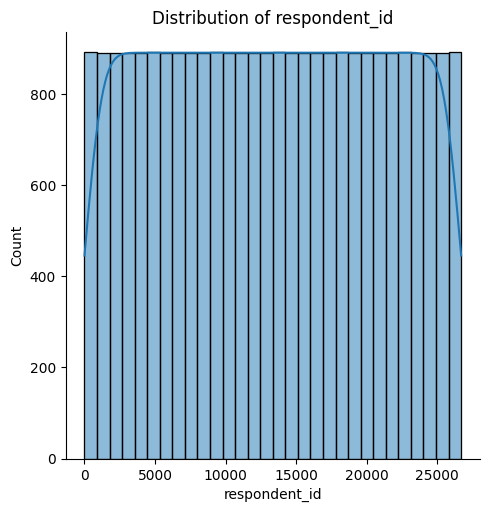

<Figure size 800x600 with 0 Axes>

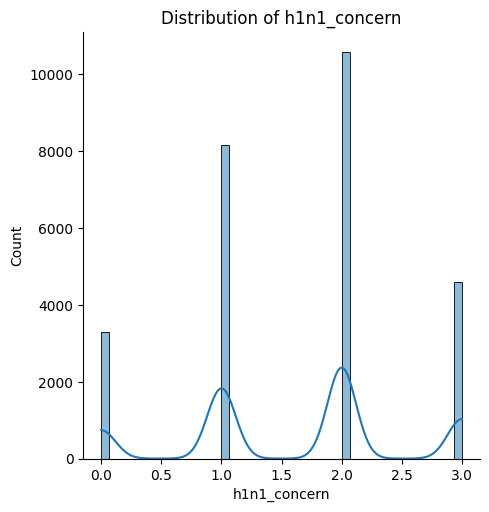

<Figure size 800x600 with 0 Axes>

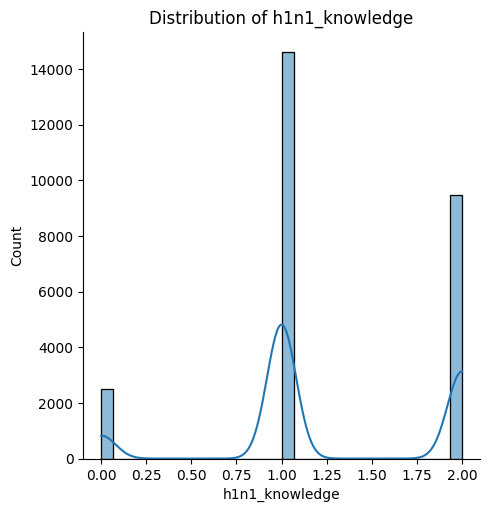

<Figure size 800x600 with 0 Axes>

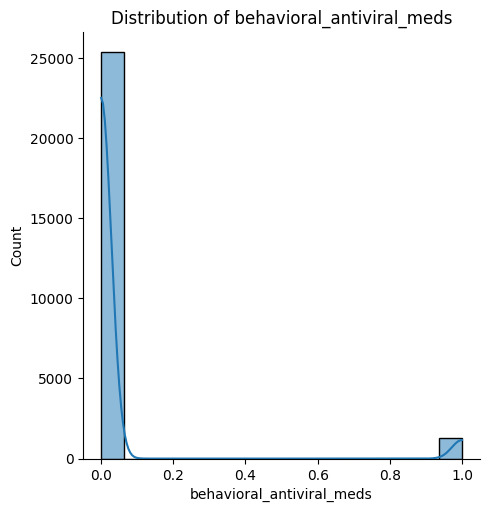

<Figure size 800x600 with 0 Axes>

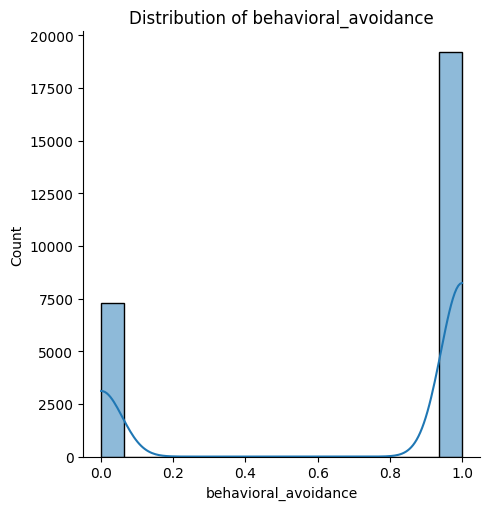

<Figure size 800x600 with 0 Axes>

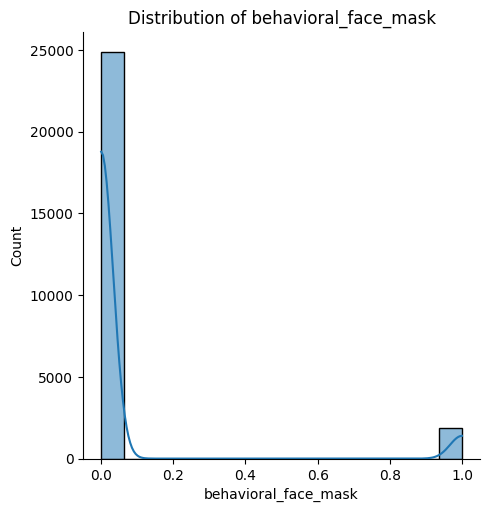

<Figure size 800x600 with 0 Axes>

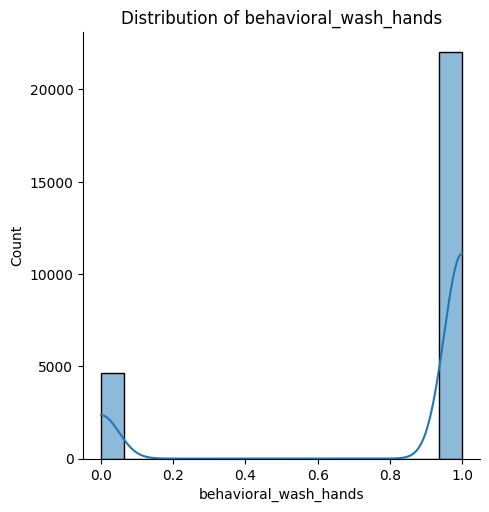

<Figure size 800x600 with 0 Axes>

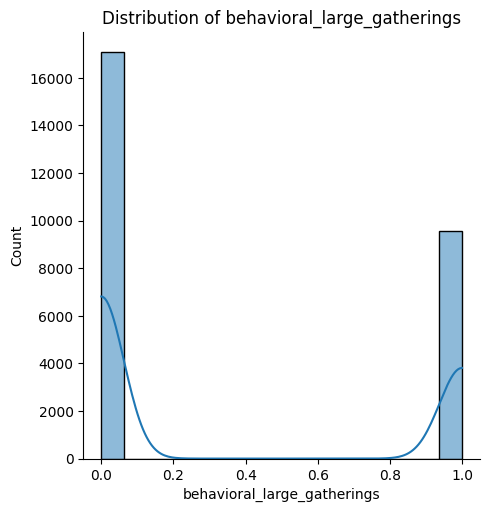

<Figure size 800x600 with 0 Axes>

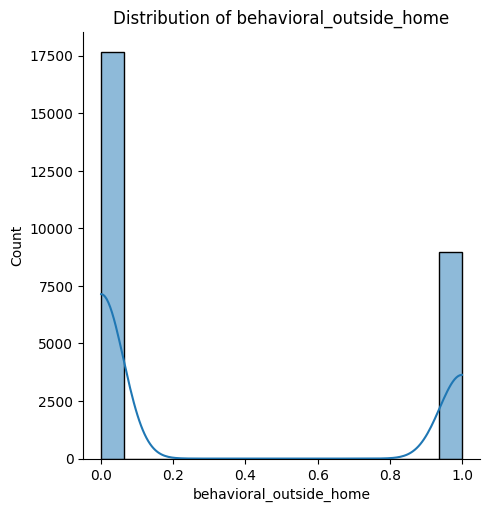

<Figure size 800x600 with 0 Axes>

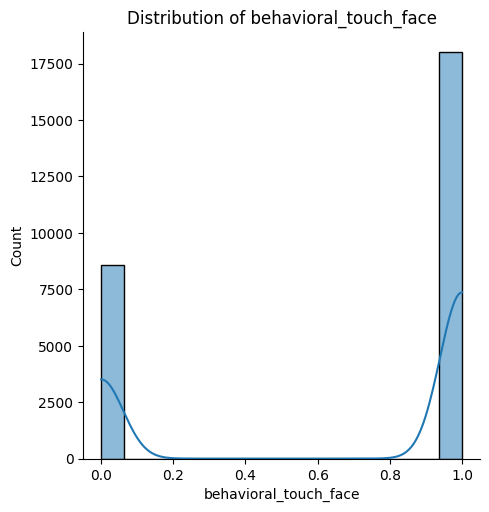

<Figure size 800x600 with 0 Axes>

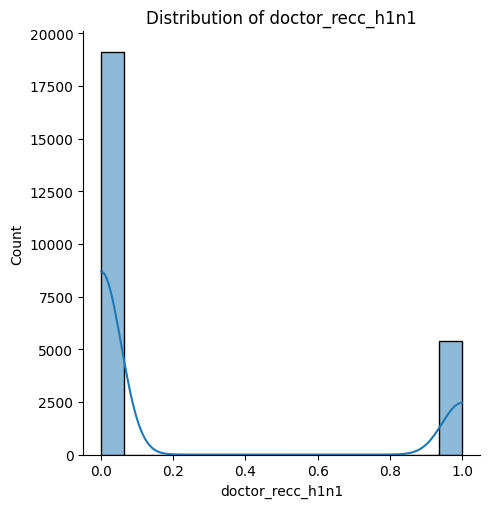

<Figure size 800x600 with 0 Axes>

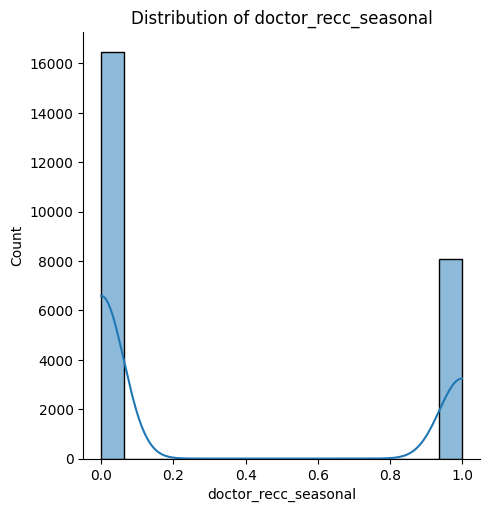

<Figure size 800x600 with 0 Axes>

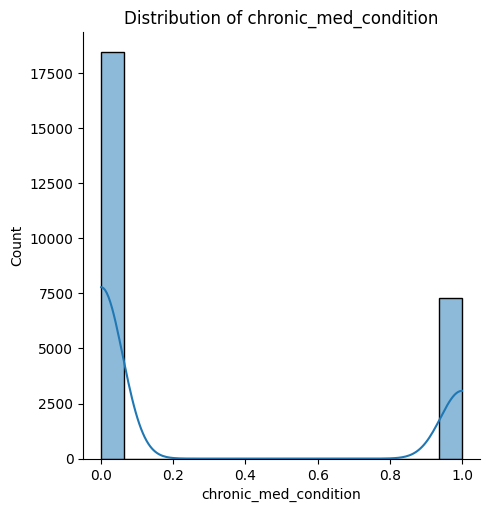

<Figure size 800x600 with 0 Axes>

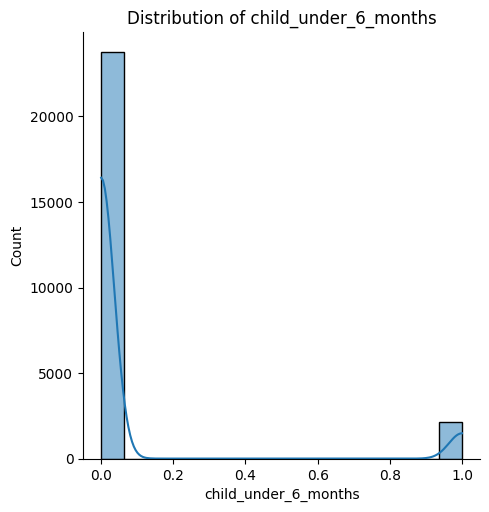

<Figure size 800x600 with 0 Axes>

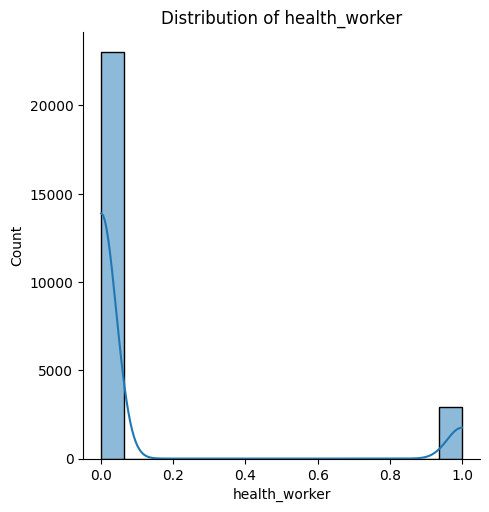

<Figure size 800x600 with 0 Axes>

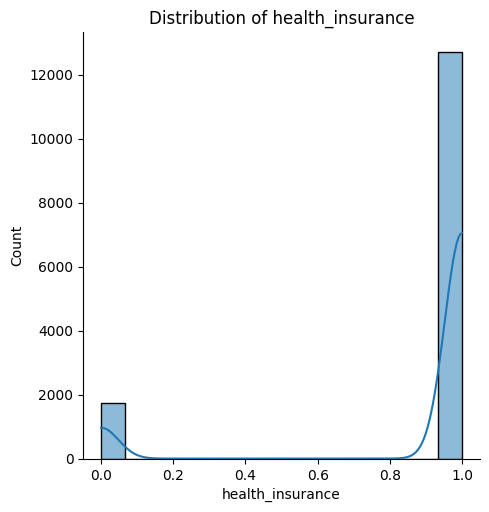

<Figure size 800x600 with 0 Axes>

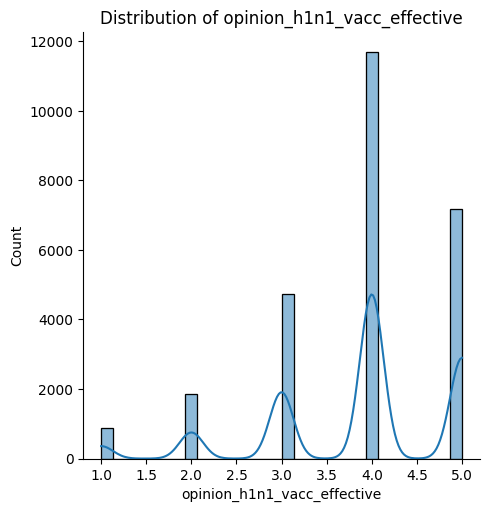

<Figure size 800x600 with 0 Axes>

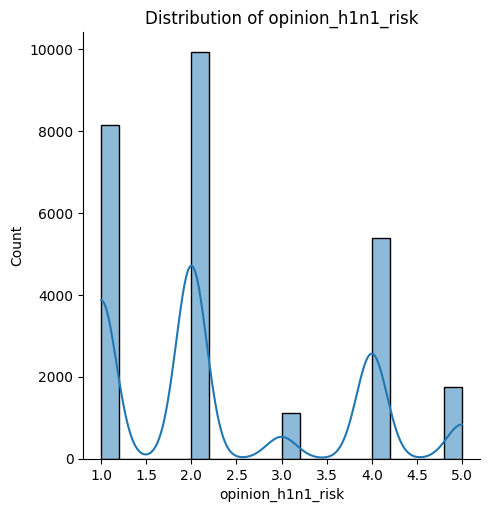

<Figure size 800x600 with 0 Axes>

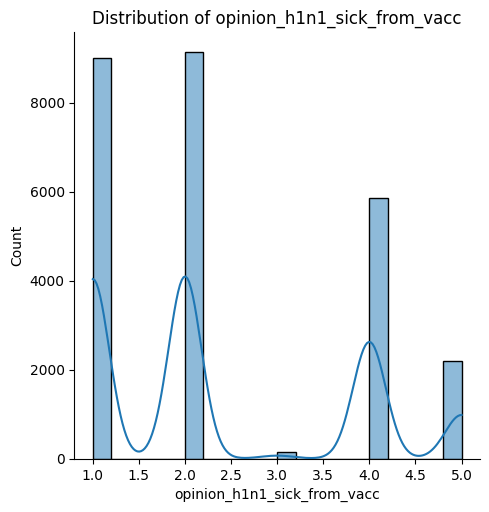

<Figure size 800x600 with 0 Axes>

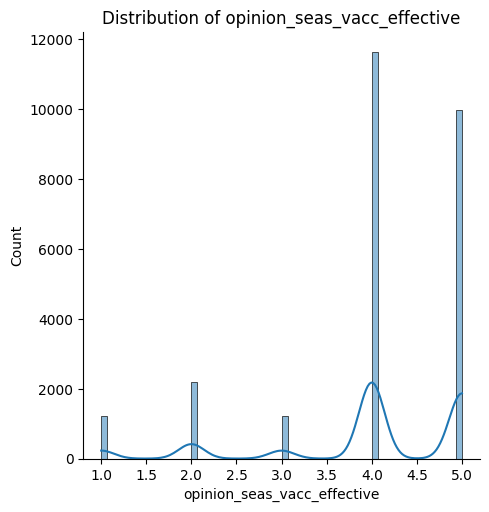

<Figure size 800x600 with 0 Axes>

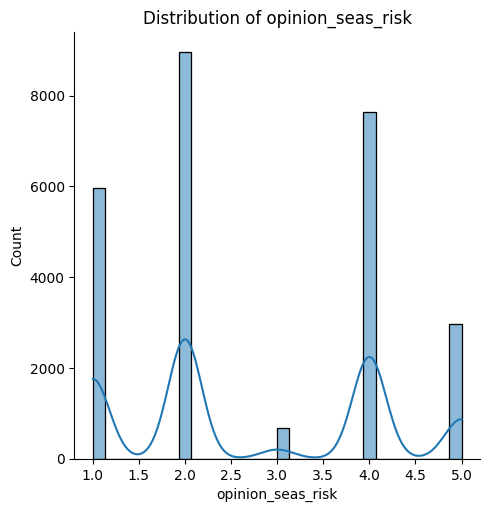

<Figure size 800x600 with 0 Axes>

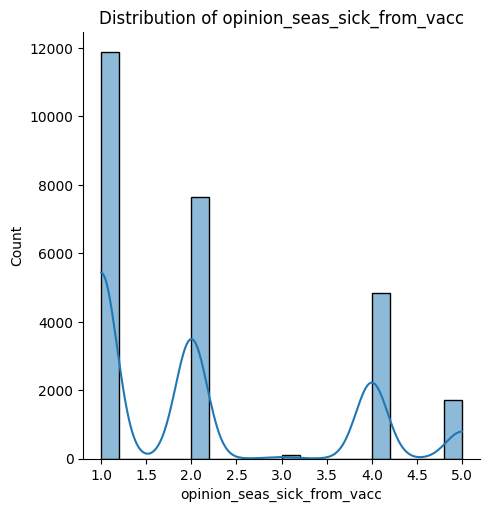

<Figure size 800x600 with 0 Axes>

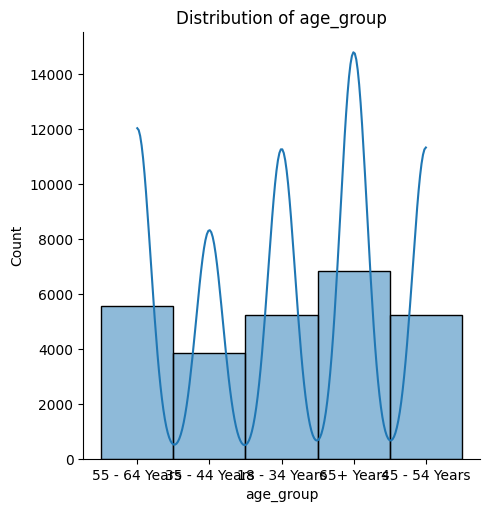

<Figure size 800x600 with 0 Axes>

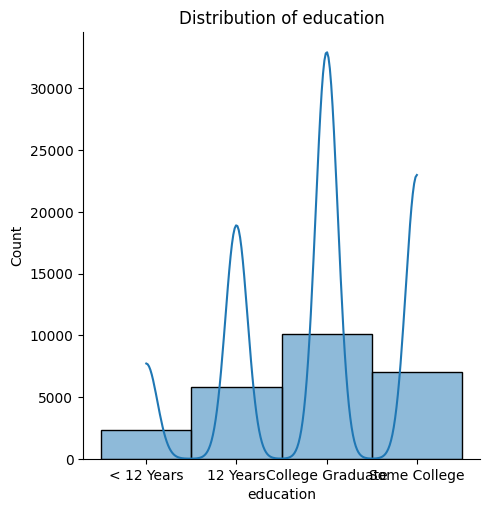

<Figure size 800x600 with 0 Axes>

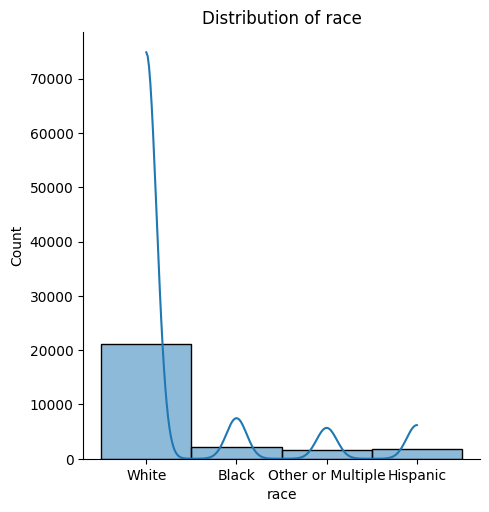

<Figure size 800x600 with 0 Axes>

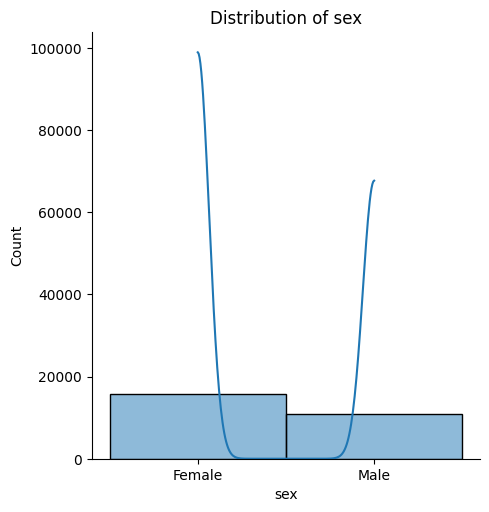

<Figure size 800x600 with 0 Axes>

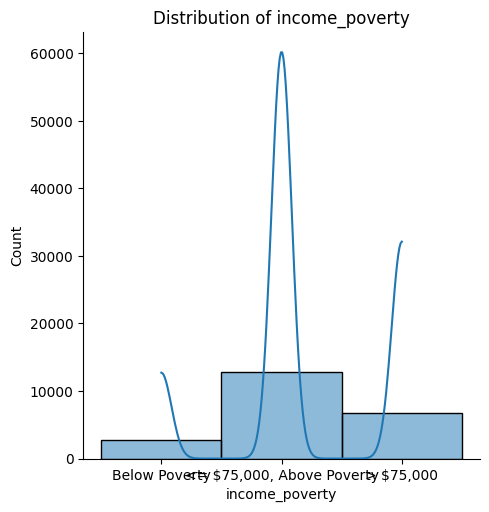

<Figure size 800x600 with 0 Axes>

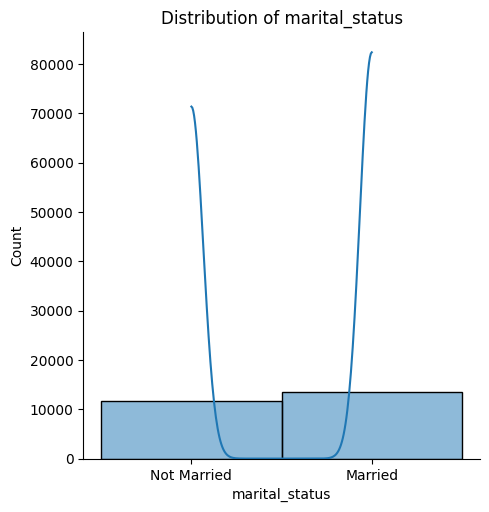

<Figure size 800x600 with 0 Axes>

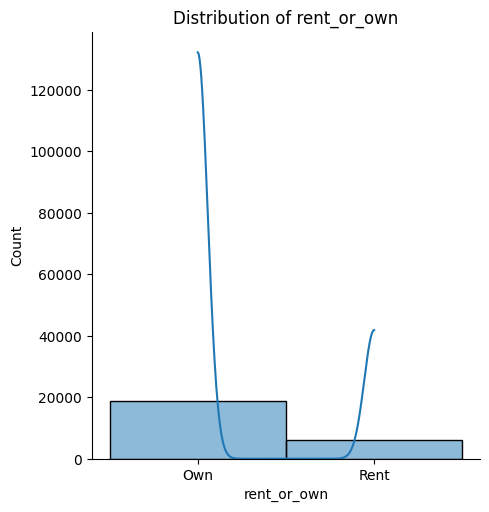

<Figure size 800x600 with 0 Axes>

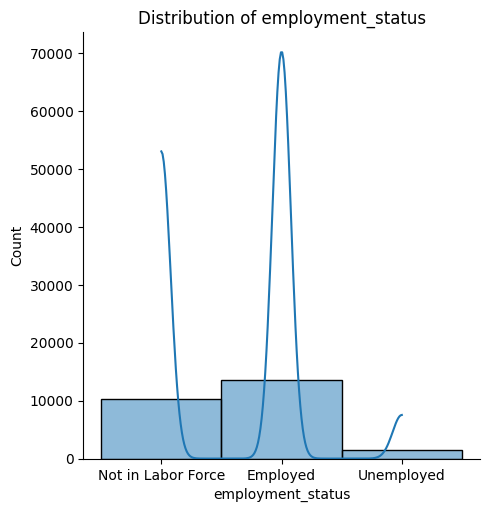

<Figure size 800x600 with 0 Axes>

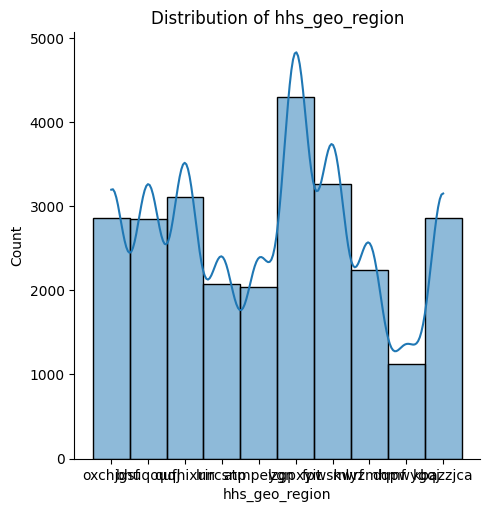

<Figure size 800x600 with 0 Axes>

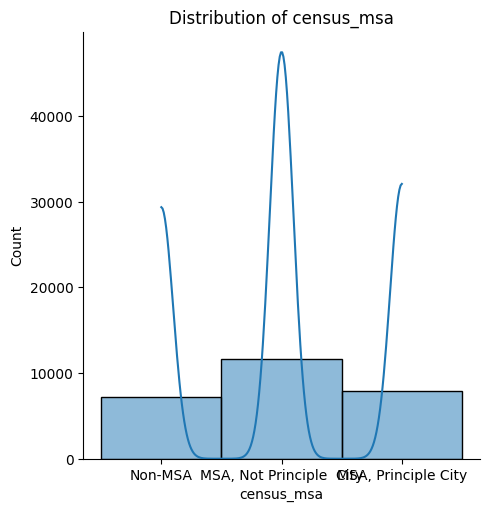

<Figure size 800x600 with 0 Axes>

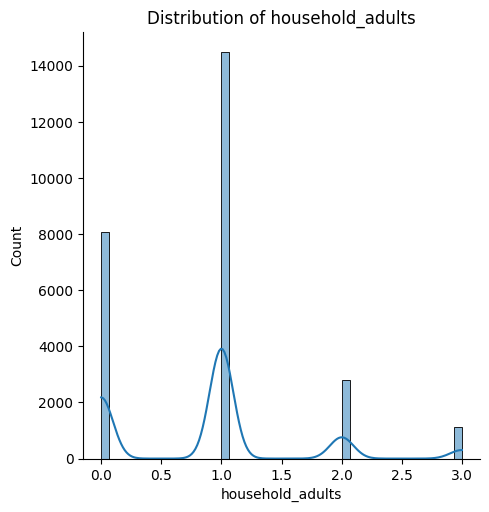

<Figure size 800x600 with 0 Axes>

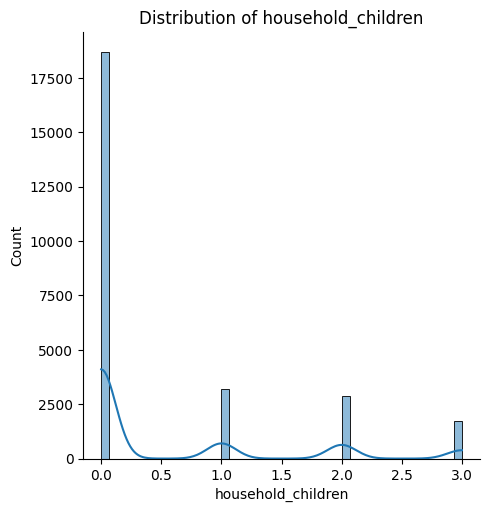

<Figure size 800x600 with 0 Axes>

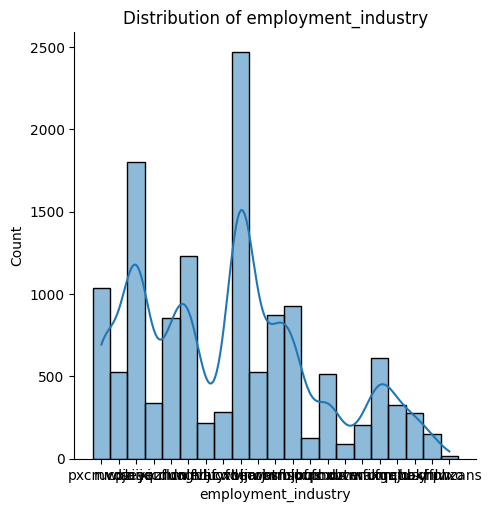

<Figure size 800x600 with 0 Axes>

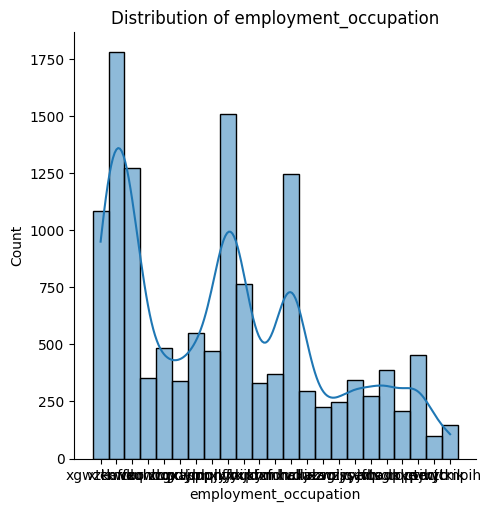

<Figure size 800x600 with 0 Axes>

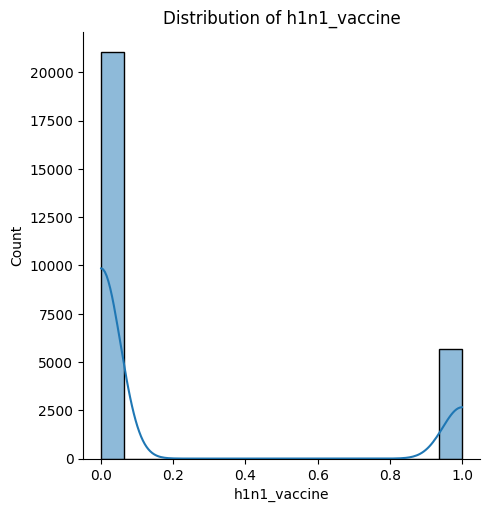

<Figure size 800x600 with 0 Axes>

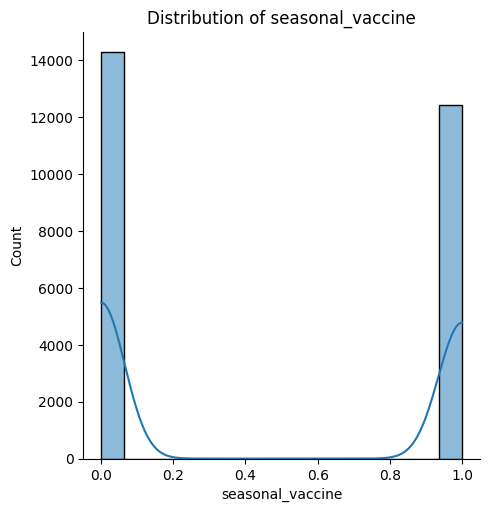

In [71]:
# Loop through each column in df_train
for column in df_train.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.displot(df_train_copy[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()


In [72]:
df_train_copy.dtypes

,0
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [73]:
df_train_copy.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [74]:
df_train_copy.isnull().sum()

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


**health_insurance Column**

In [75]:
df_train_copy['health_insurance'].unique()

array([ 1., nan,  0.])

In [76]:
# Replacing null values in the health_insurance column with 0
# This is assuming all those with a null value have no medical insurance

df_train_copy['health_insurance'].fillna(0, inplace=True)


**employment_industry & employment_occupation Columns**

In [77]:
df_train_copy['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [78]:
df_train_copy['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

Since the employment industry & employment_occupation details are not well recorded we drop the two columns

In [79]:
# Droping the employment industry and employment occupation columns

df_train_copy = df_train_copy.drop(['employment_industry', 'employment_occupation'], axis=1)


**income_poverty Column**

In [80]:
df_train_copy['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [81]:
df_train_copy['income_poverty'].isnull().sum()

4423

**doctor_recc_h1n1 Column**

In [82]:
df_train_copy['doctor_recc_h1n1'].unique()

array([ 0., nan,  1.])

In [83]:
df_train_copy['doctor_recc_h1n1'].fillna(0, inplace=True)

**behavioral_avoidance Column**

In [84]:
df_train_copy['behavioral_avoidance'].unique()

array([ 0.,  1., nan])

In [85]:
df_train_copy['behavioral_avoidance'].value_counts()

,count
behavioral_avoidance,
1.0,19228
0.0,7271


In [86]:
df_train_copy['behavioral_avoidance'].fillna(0, inplace=True)

In [87]:
# Replacing non values with either 1 or 0 based on the ratio 1301:25335 in the behavioral_antiviral_meds column

# Calculating the ratio of 1s to 0s
ratio_1 = 7271 / (7271 + 19228)

# Filling NaN values with either 1 or 0 based on the calculated ratio
df_train_copy['behavioral_avoidance'] = df_train_copy['behavioral_avoidance'].fillna(np.random.choice([1, 0], p=[ratio_1, 1 - ratio_1]))

**behavioral_antiviral_meds column**

In [88]:
df_train_copy['behavioral_antiviral_meds'].unique()

array([ 0.,  1., nan])

In [89]:
df_train_copy['behavioral_antiviral_meds'].value_counts()

,count
behavioral_antiviral_meds,
0.0,25335
1.0,1301


In [90]:
# Replacing non values with either 1 or 0 based on the ratio 1301:25335 in the behavioral_antiviral_meds column

# Calculating the ratio of 1s to 0s
ratio_1 = 1301 / (1301 + 25335)

# Filling NaN values with either 1 or 0 based on the calculated ratio
df_train_copy['behavioral_antiviral_meds'] = df_train_copy['behavioral_antiviral_meds'].fillna(np.random.choice([1, 0], p=[ratio_1, 1 - ratio_1]))


**h1n1_concern Column**

In [91]:
df_train_copy['h1n1_concern'].value_counts()

,count
h1n1_concern,
2.0,10575
1.0,8153
3.0,4591
0.0,3296


<Figure size 800x600 with 0 Axes>

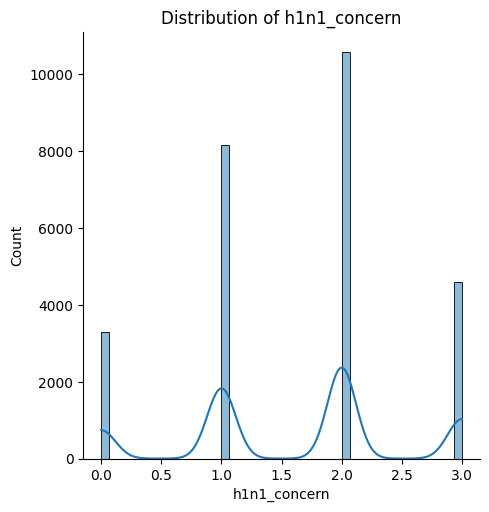

In [92]:
# A dist plot of the h1n1_concern column

plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_concern'], kde=True)
plt.title('Distribution of h1n1_concern')
plt.show()


<Figure size 800x600 with 0 Axes>

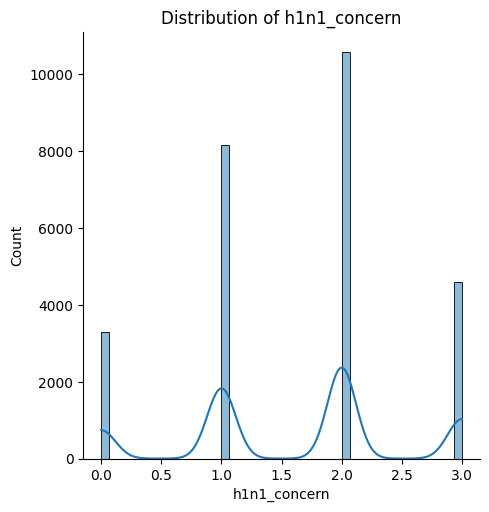

In [93]:
#Rechecking the distribution of the h1n1_concern column after replacing null values proportionately
plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_concern'], kde=True)
plt.title('Distribution of h1n1_concern')
plt.show()


**h1n1_knowledge Column**

In [94]:
df_train_copy['h1n1_knowledge'].unique()

array([ 0.,  2.,  1., nan])

In [95]:
df_train_copy['h1n1_knowledge'].value_counts()

,count
h1n1_knowledge,
1.0,14598
2.0,9487
0.0,2506


In [96]:
# Replacing the null values with either 0,1,2 randomly  while maintaining the distribution of the h1n1_knowledge column

# Calculate the proportions of each unique value in the h1n1_knowledge column
value_counts = df_train_copy['h1n1_knowledge'].value_counts(normalize=True)

# Create a list of unique values and their corresponding probabilities
unique_values = list(value_counts.index)
probabilities = list(value_counts.values)

# Replace NaN values with random choices from unique_values based on their probabilities
df_train_copy['h1n1_knowledge'] = df_train_copy['h1n1_knowledge'].fillna(np.random.choice(unique_values, p=probabilities))


In [97]:
df_train.isnull().sum()

,0
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


In [98]:
# Using machine learning to replace missing values in df_train

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select only the numerical columns for imputation
numerical_cols = df_train_copy.select_dtypes(include=np.number).columns

# Create an IterativeImputer object
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the numerical columns
df_train_copy[numerical_cols] = imputer.fit_transform(df_train_copy[numerical_cols])

# Now, df_train_copy has missing values in numerical columns filled using machine learning

# You can further check for missing values:
df_train_copy.isnull().sum()



,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


In [99]:
# Using machine learning to replace missing values in df_train

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Select only the numerical columns for imputation
numerical_cols = df_train_copy.select_dtypes(include=np.number).columns

# Create an IterativeImputer object
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the numerical columns
df_train_copy[numerical_cols] = imputer.fit_transform(df_train_copy[numerical_cols])

# Now, df_train_copy has missing values in numerical columns filled using machine learning

# You can further check for missing values:
df_train_copy.isnull().sum()



,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


**education column**

In [100]:
df_train_copy['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [101]:
df_train_copy['education'].value_counts()

,count
education,
College Graduate,10097
Some College,7043
12 Years,5797
< 12 Years,2363


**marital_status column**

In [102]:
df_train_copy['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [103]:
df_train_copy['marital_status'].value_counts()

,count
marital_status,
Married,13555
Not Married,11744


In [104]:
# Replacing the nan values marital_status colum with either Married or Not Married using machine learning

from sklearn.impute import KNNImputer

# Select the 'marital_status' column and convert it to numerical values using one-hot encoding
marital_status_encoded = pd.get_dummies(df_train_copy['marital_status'], dummy_na=True)

# Concatenate the encoded 'marital_status' column with the original dataframe
df_train_copy = pd.concat([df_train_copy, marital_status_encoded], axis=1)

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the numerical columns, including the encoded 'marital_status'
numerical_cols = df_train_copy.select_dtypes(include=np.number).columns
df_train_copy[numerical_cols] = imputer.fit_transform(df_train_copy[numerical_cols])

# Now, df_train_copy has missing values in 'marital_status' filled using KNN imputation

# Inverse transform the encoded columns back to the original 'marital_status' column
# Find the indices of the columns representing the encoded marital status
encoded_marital_status_cols = [col for col in df_train_copy.columns if col in marital_status_encoded.columns]

# Find the row indices where the 'marital_status' column was originally NaN
nan_indices = df_train_copy['marital_status'].isnull()

# Create a mapping from the numerical encoded values to the original categories
mapping = {i: col for i, col in enumerate(marital_status_encoded.columns)}

# Loop through the rows where 'marital_status' was NaN
for index in df_train_copy[nan_indices].index:
    # Find the encoded values for the current row
    encoded_values = df_train_copy.loc[index, encoded_marital_status_cols].values

    # Find the index of the maximum encoded value (most probable category)
    predicted_category_index = np.argmax(encoded_values)

    # Find the corresponding category from the mapping
    predicted_category = mapping[predicted_category_index]

    # Assign the predicted category to the 'marital_status' column
    df_train_copy.loc[index, 'marital_status'] = predicted_category


# Check if the 'marital_status' column has any missing values
print(df_train_copy['marital_status'].isnull().sum())


1408


**rent_or_own Column**

In [105]:
df_train_copy['rent_or_own'].unique()

array(['Own', 'Rent', nan], dtype=object)

In [106]:
df_train_copy['rent_or_own'].value_counts()

,count
rent_or_own,
Own,18736
Rent,5929


In [107]:
# Replace the nan values rent_or_own colum with either Own or Rent using machine learning

from sklearn.impute import KNNImputer

# Select the 'rent_or_own' column
rent_or_own_column = df_train_copy['rent_or_own']

# Convert categorical values to numerical using Label Encoding (optional, but can improve KNN performance)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rent_or_own_encoded = le.fit_transform(rent_or_own_column.fillna('Unknown'))  # Fill NaN with 'Unknown' for now

# Reshape the encoded data to fit the KNNImputer
rent_or_own_encoded_reshaped = rent_or_own_encoded.reshape(-1, 1)

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the imputer on the encoded data
rent_or_own_imputed = imputer.fit_transform(rent_or_own_encoded_reshaped)

# Convert the imputed numerical values back to categorical
rent_or_own_imputed_decoded = le.inverse_transform(rent_or_own_imputed.astype(int).flatten())

# Replace the original 'rent_or_own' column with the imputed values
df_train_copy['rent_or_own'] = rent_or_own_imputed_decoded

# You can now check for missing values in the 'rent_or_own' column:
print(df_train_copy['rent_or_own'].isnull().sum())


0


In [108]:
df_train_copy.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


**employment_status, marital_status,income_poverty& education columns**

In [109]:
df_train_copy['employment_status'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [110]:
df_train_copy['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [111]:
df_train_copy['income_poverty'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [112]:
df_train_copy['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [113]:
# Using machine learning to replace nan values in  employment_status, marital_status,income_poverty,education columns

# Select columns with missing values
cols_to_impute = ['employment_status', 'marital_status', 'income_poverty', 'education']

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Loop through the columns and impute missing values using KNN
for col in cols_to_impute:
  # Convert categorical values to numerical using Label Encoding (optional, but can improve KNN performance)
  le = LabelEncoder()
  encoded_col = le.fit_transform(df_train_copy[col].fillna('Unknown'))  # Fill NaN with 'Unknown' for now
  encoded_col_reshaped = encoded_col.reshape(-1, 1)

  # Fit and transform the imputer on the encoded column
  imputed_col = imputer.fit_transform(encoded_col_reshaped)

  # Convert the imputed numerical values back to categorical
  imputed_col_decoded = le.inverse_transform(imputed_col.astype(int).flatten())

  # Replace the original column with the imputed values
  df_train_copy[col] = imputed_col_decoded

# Check for missing values in the imputed columns
print(df_train_copy[cols_to_impute].isnull().sum())


employment_status    0
marital_status       0
income_poverty       0
education            0
dtype: int64


In [114]:
df_train_copy.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


In [115]:
df_cleaned = df_train_copy.copy()

In [120]:
# prompt: drop the last column

df_cleaned = df_cleaned.iloc[:, :-1]


In [121]:
df_cleaned.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,Married,Not Married
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0.0,0.0,False,True
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0.0,1.0,False,True
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0.0,0.0,False,True
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0.0,1.0,False,True
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0.0,0.0,True,False


# Modeling

In [122]:
# prompt: create a base model to predict h1n1_vaccine, and seasonal_vaccine. The predictions for the two target variables should be float probabilities that range between 0.0 and 1.0.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Separate features (X) and target variables (y)
X = df_cleaned.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = df_cleaned['h1n1_vaccine']
y_seasonal = df_cleaned['seasonal_vaccine']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, dummy_na=True)

# Split the data into training and testing sets
X_train, X_test, y_h1n1_train, y_h1n1_test, y_seasonal_train, y_seasonal_test = train_test_split(
    X, y_h1n1, y_seasonal, test_size=0.2, random_state=42
)

# Create a Logistic Regression model
model_h1n1 = LogisticRegression(max_iter=1000)
model_seasonal = LogisticRegression(max_iter=1000)

# Train the model for h1n1_vaccine prediction
model_h1n1.fit(X_train, y_h1n1_train)

# Train the model for seasonal_vaccine prediction
model_seasonal.fit(X_train, y_seasonal_train)

# Predict probabilities for h1n1_vaccine
y_h1n1_pred_proba = model_h1n1.predict_proba(X_test)[:, 1]

# Predict probabilities for seasonal_vaccine
y_seasonal_pred_proba = model_seasonal.predict_proba(X_test)[:, 1]

# Evaluate the model using AUC
auc_h1n1 = roc_auc_score(y_h1n1_test, y_h1n1_pred_proba)
auc_seasonal = roc_auc_score(y_seasonal_test, y_seasonal_pred_proba)

print(f"AUC for h1n1_vaccine prediction: {auc_h1n1}")
print(f"AUC for seasonal_vaccine prediction: {auc_seasonal}")


AUC for h1n1_vaccine prediction: 0.86059698795687
AUC for seasonal_vaccine prediction: 0.8597846042551617
